# KMeans: David Cerchiaro

## Importamos las librerias

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [32]:
df = pd.read_csv('dataset.csv')

In [33]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [35]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [59]:
dff = df.drop(['CustomerID','Gender'],axis=1)
dff.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


## Visualizamos los datos

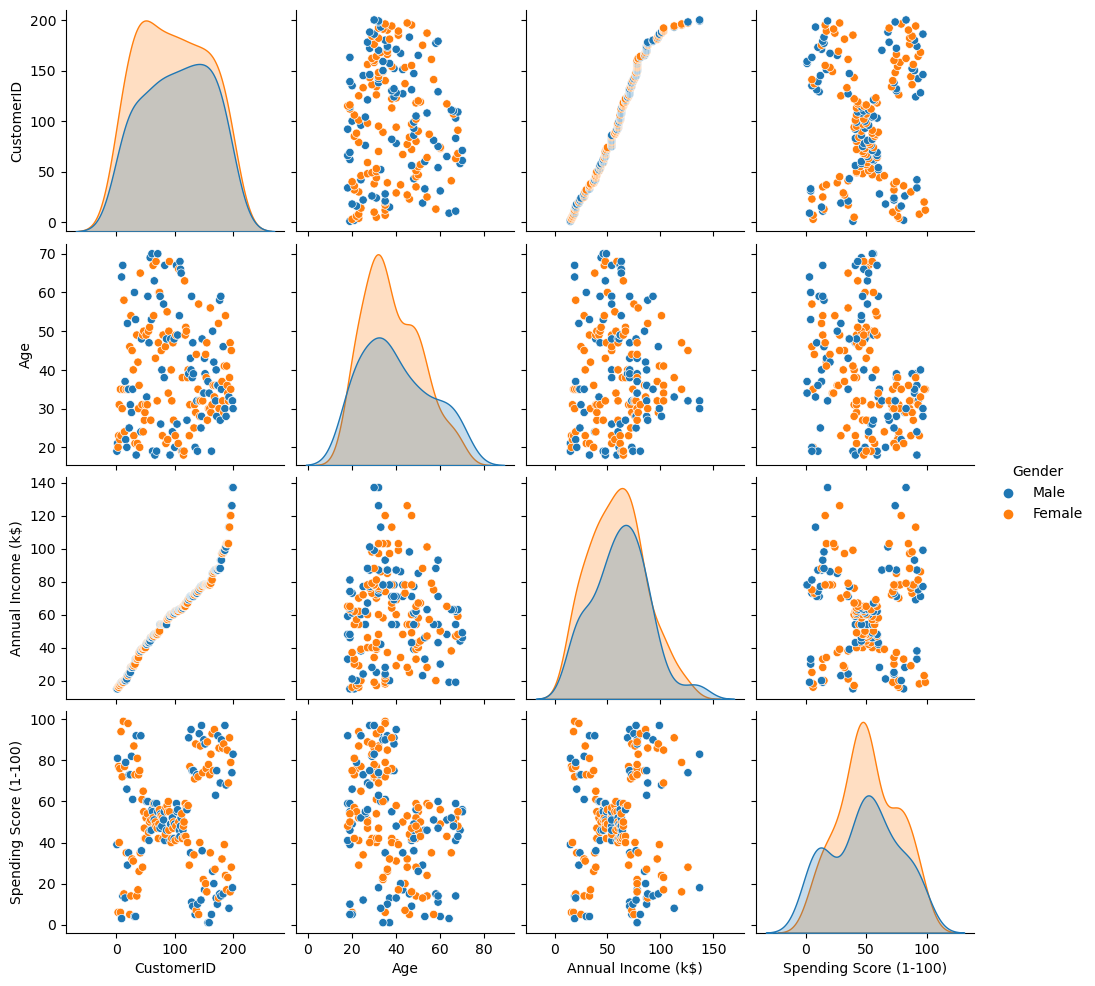

In [37]:
sns.pairplot(df,hue='Gender')

In [38]:
df.groupby(['Gender'])[['Age', 'Annual Income (k$)','Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


## Normalizar valores
vamos a normalizar los valores de las columnas Annual Income (k$) y Spending Score (1-100) para tenerlas en un solo rango.

In [48]:
dff.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [63]:
dff1 = (dff - dff.min()) / ( dff.max() - dff.min() )
dff1.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,0.400962,0.373443,0.502041
std,0.268635,0.215285,0.263505
min,0.000000,0.000000,0.000000
25%,0.206731,0.217213,0.344388
50%,0.346154,0.381148,0.500000
75%,0.596154,0.516393,0.734694
max,1.000000,1.000000,1.000000


## Calcular el numero de clusters

In [91]:
from sklearn.metrics import silhouette_score
n_clusters_range = range(2, 11)
silhouette_scores = []
wcss = []
X = dff1[['Annual Income (k$)', 'Spending Score (1-100)']]
for n_clusters in n_clusters_range:
    # Fit KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    wcss.append(kmeans.inertia_)
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Find the best number of clusters based on the highest silhouette score
best_n_clusters = n_clusters_range[np.argmax(silhouette_scores)]
best_silhouette_score = max(silhouette_scores)

print(f"Best number of clusters: {best_n_clusters}")
print(f"Corresponding silhouette score: {best_silhouette_score}")

Best number of clusters: 5
Corresponding silhouette score: 0.5594854531357839


### Grafica de WCSS

Text(0, 0.5, 'Suma de Cuadrados Dentro del Grupo WCSS')

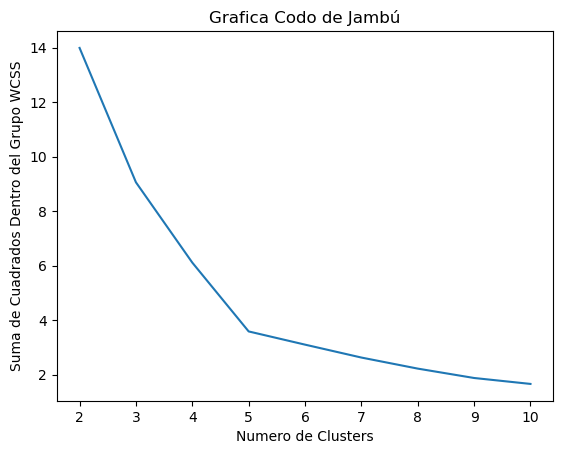

In [95]:
plt.plot(range(2,11),wcss)
plt.title('Grafica Codo de Jambú')
plt.xlabel('Numero de Clusters')
plt.ylabel('Suma de Cuadrados Dentro del Grupo WCSS')

In [160]:
clustering = KMeans(n_clusters=best_n_clusters, random_state=300)
clustering.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])

KMeans(n_clusters=5, random_state=300)

In [161]:
dff1['kmeas_clustering'] = clustering.labels_
dff1.head()

,Age,Annual Income (k$),Spending Score (1-100),kmeas_clustering
0,0.019231,0.000000,0.387755,3
1,0.057692,0.000000,0.816327,4
2,0.038462,0.008197,0.051020,3
3,0.096154,0.008197,0.775510,4
4,0.250000,0.016393,0.397959,3


## Visualización de los clusters

In [170]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 2)
pca_dff = pca.fit_transform(dff)
poa_dff1 = pd.DataFrame(data =pca_dff, columns = ['component_1', 'component_2'])
pca_names= pd.concat([poa_dff1, dff1[['kmeas_clustering']]], axis=1)

pca_names.head()

,component_1,component_2,kmeas_clustering
0,-31.870508,-33.001425,3
1,0.763397,-56.843865,4
2,-57.408726,-13.122936,3
3,-2.169896,-53.477905,4
4,-32.174920,-30.387005,3


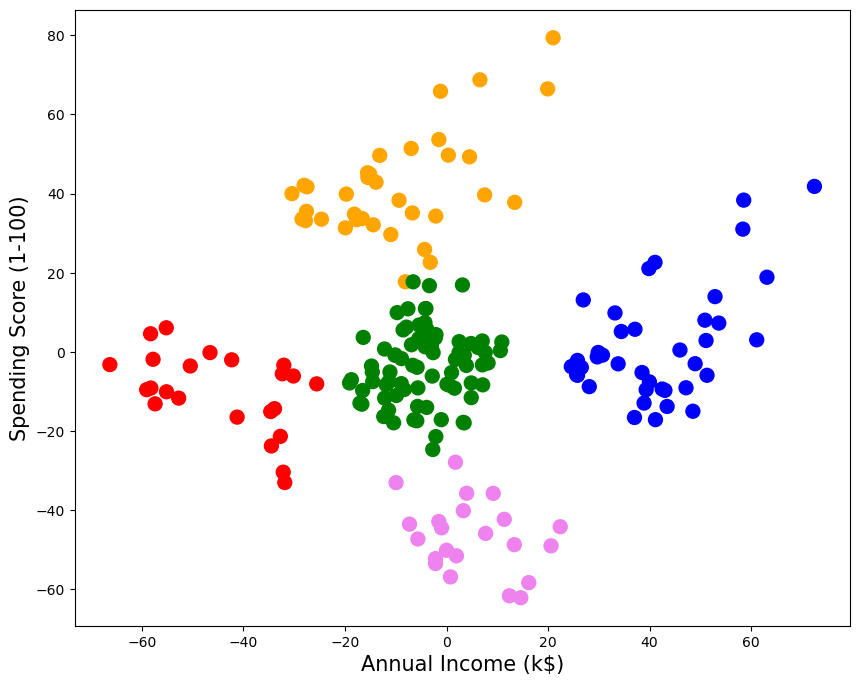

In [182]:
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(1,1,1)

color_theme = np.array(['blue','green','orange','red','violet','black'])
ax.scatter(x = pca_names.component_1, y = pca_names.component_2, c = color_theme[pca_names.kmeas_clustering], s = 100)
ax.set_xlabel('Annual Income (k$)',fontsize=15)
ax.set_ylabel('Spending Score (1-100)',fontsize=15)
plt.show()
